# Fisher Iris Analysis

## Libraries Imported for the Project

In [1]:
# Libraries Imported.
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
import warnings
from itertools import combinations
import os

In [2]:
#Turning off user warnings in the notebook.
warnings.filterwarnings('ignore' ) 

In [3]:
# Get the current working directory
current_directory = os.getcwd()

In [4]:
folder_name = 'Text Files'
folder_path = os.path.join(current_directory, folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [5]:
sum_folder = 'Summary'
sum_path = os.path.join(current_directory, sum_folder)
if not os.path.exists(sum_path):
    os.makedirs(sum_path)

In [6]:
dist_folder = 'Distribution'
dist_path = os.path.join(current_directory, dist_folder)
if not os.path.exists(dist_path):
    os.makedirs(dist_path)

In [7]:
corr_folder = 'Correlation'
corr_path = os.path.join(current_directory, corr_folder)
if not os.path.exists(corr_path):
    os.makedirs(corr_path)

## Problem Statement

This project concerns the well-known Fisher’s Iris data set. You must research the data set and write documentation and code (in Python [1]) to investigate it. An online search for information on the data set will convince you that many people have investigated it previously. You are expected to be able to break this project into several smaller tasks that are easier to solve, and to plug these together after they have been completed.  

You might do that for this project as follows:

1. **Research the data set online and write a summary about it in your README.**
2. **Download the data set and add it to your repository.**
3. **Write a program called analysis.py that:**
   1. Outputs a summary of each variable to a single text file,
   2. Saves a histogram of each variable to png files, and
   3. Outputs a scatter plot of each pair of variables.
4. **Performs any other analysis you think is appropriate.**

You may produce a Jupyter notebook as well containing all your comment. This notebook should only contain text that you have written yourself, (it may contain referenced code from other sources). I will harshly mark any text (not code) that I feel is not written directly by you. I want to know what YOU think, not some third party. Please make sure the style of your documentation is consistent. It might help to suppose that your manager has asked you to investigate the data set, with a view to explaining it to your colleagues. Imagine that you are to give a presentation on the data set in a few weeks’ time, where you explain what investigating a data set entails and how Python can be used to do it. You have not been asked to create a deck of presentation slides, but rather to present your code and its output to them.


## Project

In [8]:
df = sns.load_dataset('iris') # Loading in Dataset

In [9]:
df.info() # Getting an idea of the data types and if there are any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
df.describe() # Calling the .describe function to give me a set of summary statistics for the numeric attributes in the data frame.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df_stats = df.describe().T

df_stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [13]:
# Transpose the DataFrame
trans_df_stats = df_stats.T

# Convert DataFrame to a formatted string
summary_txt = trans_df_stats.to_string(float_format='%.2f')

# Save formatted string to a text file
file_path = os.path.join(folder_path, 'summary_statistics.txt')
with open(file_path, 'w') as file:
    file.write(summary_txt)

In [14]:
# Summary statistics for each species
spec_df_stats = df.groupby('species').describe()


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
spec_df_stats

sepal_length                                             sepal_width                                               petal_length                                              petal_width                                          
                  count   mean       std  min    25%  50%  75%  max       count   mean       std  min    25%  50%    75%  max        count   mean       std  min  25%   50%    75%  max       count   mean       std  min  25%  50%  75%  max
species                                                                                                                                                                                                                                      
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4         50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9        50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8         50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9        50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

In [15]:
# Transpose the DataFrame
trans_spec_df_stats = spec_df_stats.T

# Convert DataFrame to a formatted string
summary_txt = trans_spec_df_stats.to_string(float_format='%.2f')

# Save formatted string to a text file
file_path = os.path.join(folder_path, 'species_summary_statistics.txt')
with open(file_path, 'w') as file:
    file.write(summary_txt)


**Background of the Dataset**

The Iris dataset is a classic dataset in the field of pattern recognition and machine learning. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems" as an example of discriminant analysis. The dataset consists of 150 samples of Iris flowers, each with four features: the sepal length, sepal width, petal length, and petal width. Each sample is labeled with one of three species of Iris: setosa, versicolor, or virginica.

**Overview of Variables**

**Categorical:**

- **species:** This variable indicates the species of Iris. It has three categories: setosa, versicolor, and virginica.

**Numerical:**

- **sepal_length_cm:** Length of the sepal in centimeters.
- **sepal_width_cm:** Width of the sepal in centimeters.
- **petal_length_cm:** Length of the petal in centimeters.
- **petal_width_cm:** Width of the petal in centimeters.

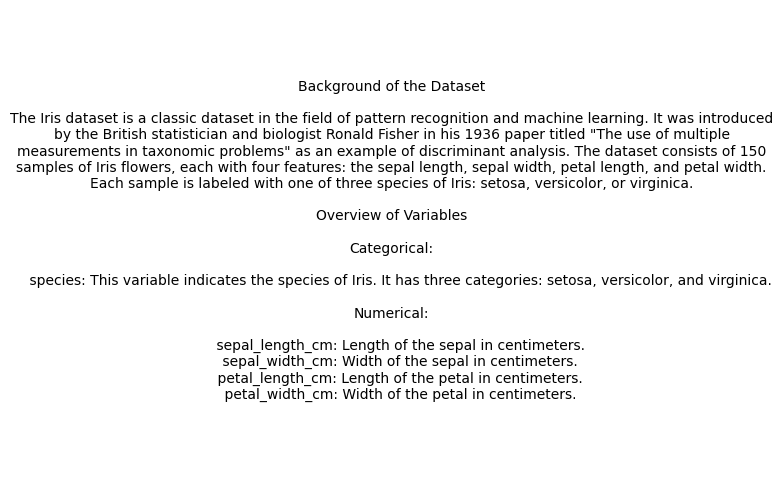

In [16]:
# Markdown content
background_text = """
Background of the Dataset

The Iris dataset is a classic dataset in the field of pattern recognition and machine learning. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems" as an example of discriminant analysis. The dataset consists of 150 samples of Iris flowers, each with four features: the sepal length, sepal width, petal length, and petal width. Each sample is labeled with one of three species of Iris: setosa, versicolor, or virginica.

Overview of Variables

Categorical:

    species: This variable indicates the species of Iris. It has three categories: setosa, versicolor, and virginica.

Numerical:

    sepal_length_cm: Length of the sepal in centimeters.
    sepal_width_cm: Width of the sepal in centimeters.
    petal_length_cm: Length of the petal in centimeters.
    petal_width_cm: Width of the petal in centimeters.
"""

# Saving markdown content as a PNG file
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, background_text, va='center', ha='center', wrap=True)
plt.axis('off')
plt.savefig(os.path.join(sum_path, 'background.png',), dpi=300, bbox_inches='tight', pad_inches=0.1)
# Save the plot to the 'Summary' folder
plt.show()

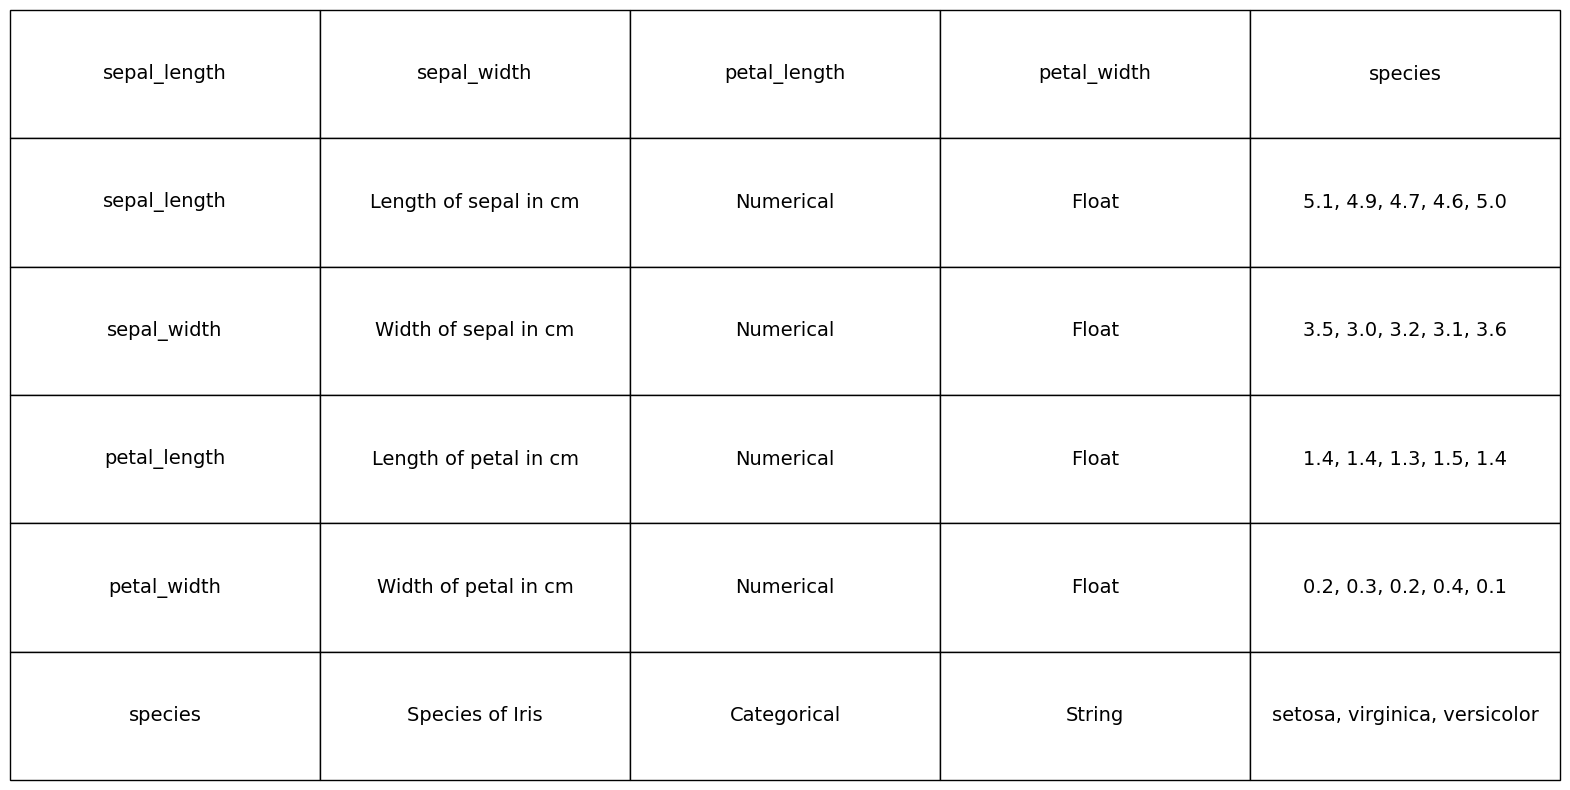

In [17]:
# Data
data = [
    ["sepal_length", "Length of sepal in cm", "Numerical", "Float", "5.1, 4.9, 4.7, 4.6, 5.0"],
    ["sepal_width", "Width of sepal in cm", "Numerical", "Float", "3.5, 3.0, 3.2, 3.1, 3.6"],
    ["petal_length", "Length of petal in cm", "Numerical", "Float", "1.4, 1.4, 1.3, 1.5, 1.4"],
    ["petal_width", "Width of petal in cm", "Numerical", "Float", "0.2, 0.3, 0.2, 0.4, 0.1"],
    ["species", "Species of Iris", "Categorical", "String", "setosa, virginica, versicolor"]
]

# Creating DataFrame
df_desc = pd.DataFrame(data, columns=["Variable", "Description", "Variable Type", "Data Type", "Sample Data"])

# Tabulating data
tabular_data = tabulate(df_desc, headers='keys', tablefmt='pipe', showindex=False)

# Saving as PNG
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_desc.values, colLabels=df.columns, bbox=[0,0,1,1], colLoc='center', cellLoc='center')

# Increase font size
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.savefig(os.path.join(sum_path, 'description.png',), bbox_inches='tight', pad_inches=0.05)
plt.show()

**Categorical Variables**

The `species` variable is a categorical variable. The reasoning for this is:

1. The values are qualitative, in that they are not measured in a value that can be measured.
2. There is no means to perform numerical calculations on them.
3. The values cannot be ordered or ranked in any way other than alphabetically.
4. There are only a distinct number of values in the variable.

Additionally, it is a  string as they it is represented by alphabetical characters, is used to categorise and has no non-numeric values.


**Numerical Variables**

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` variables are all numerical. The reasoning for this is:

1. The values for these variables are quantitative, in that they are measured with a value that can be measured and the value is a number.
2. Numerical operations can be performed on them.
3. They can be ordered or ranked based on value.

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` have a float data type as they can be represented to a number of decimal places and are so in the data collected.


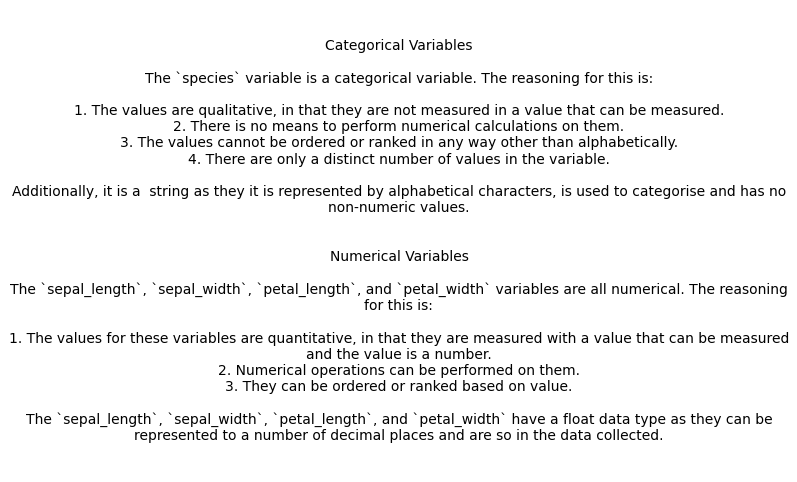

In [18]:
# Markdown content
var_desc_text = """
Categorical Variables

The `species` variable is a categorical variable. The reasoning for this is:

1. The values are qualitative, in that they are not measured in a value that can be measured.
2. There is no means to perform numerical calculations on them.
3. The values cannot be ordered or ranked in any way other than alphabetically.
4. There are only a distinct number of values in the variable.

Additionally, it is a  string as they it is represented by alphabetical characters, is used to categorise and has no non-numeric values.


Numerical Variables

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` variables are all numerical. The reasoning for this is:

1. The values for these variables are quantitative, in that they are measured with a value that can be measured and the value is a number.
2. Numerical operations can be performed on them.
3. They can be ordered or ranked based on value.

The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` have a float data type as they can be represented to a number of decimal places and are so in the data collected.
"""

# Saving markdown content as a PNG file
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, var_desc_text, va='center', ha='center', wrap=True)
plt.axis('off')
plt.savefig(os.path.join(sum_path, 'variables.png',), dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [19]:
#Creating a function
def bar_label(ax):
    for i in ax.patches: # Looping through each bar in the barplot.
        # Using the .annotate element to add text to the graph. 
        ax.annotate(format(i.get_height(), '.2f'), # Getting the height to 2 decimal places. .get_height will return the height of the bar. This is done for all bars in the graph as its a for loop.
                    # .get_x will return the x-coordinate of the left hand side of each bar/ .get_width returns the width of the bar.
                    # First getting the x-cord of the left hand side and adding the width. Then dividing by 2 to centre where the text should be.
                       (i.get_x() + i.get_width() / 2., i.get_height()), # get_height is used to denote where on the Y axis the text should be
                       ha = 'center', va = 'center', # Aligning the text to be horizontally and vertically centred.
                       size=18, # Denoting the font size of the text to be 18.
                       # Setting the coordinates of the text on the x axis to be 0, as I am happy with the text being centred.
                       xytext = (0, -14),  # Setting the coordinates of text on the y axis to be -14, as I would like the text to be just below the top of the bar.
                       textcoords = 'offset points') # Offsetting the text from reference points.

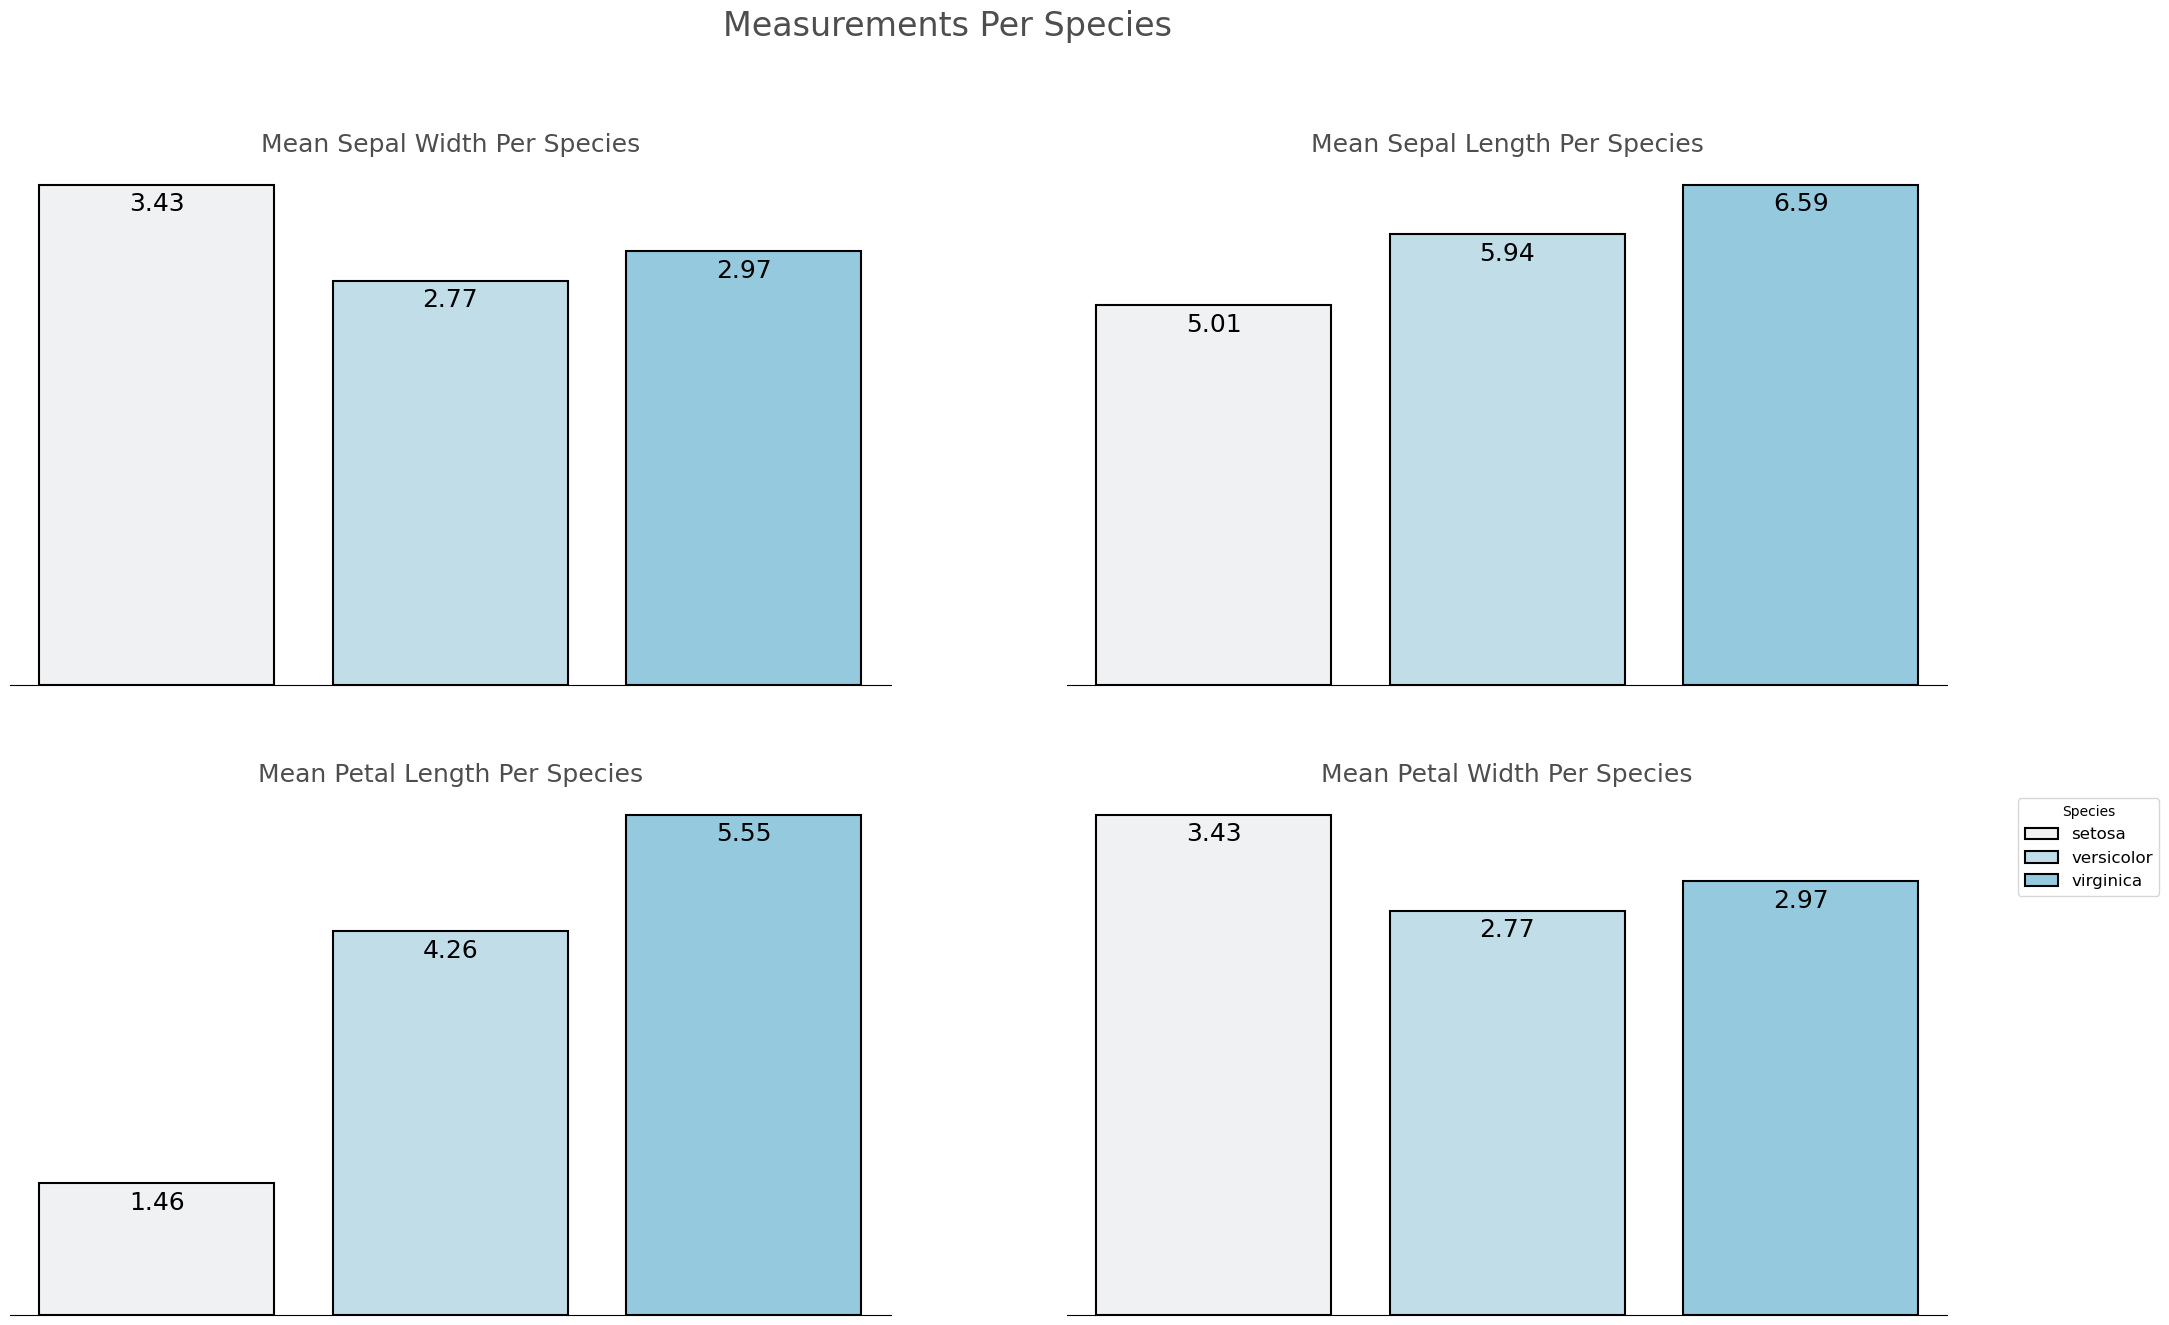

In [20]:
# Set the figure size
plt.figure(figsize=(25, 15))

# Plot for sepal width
plt.subplot(2, 2, 1)
ax_1 = sns.barplot(data=df, x="species", y="sepal_width", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Width Per Species', size=18, color='#4f4e4e')
ax_1.legend_.remove() # Remove individual legends

# Plot for sepal length
plt.subplot(2, 2, 2)
ax_2 = sns.barplot(data=df, x="species", y="sepal_length", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Length Per Species', size=18, color='#4f4e4e')
ax_2.legend_.remove() # Remove individual legends

# Plot for petal length
plt.subplot(2, 2, 3)
ax_3 = sns.barplot(data=df, x="species", y="petal_length", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Length Per Species', size=18, color='#4f4e4e')
ax_3.legend_.remove() # Remove individual legends

# Plot for petal width
plt.subplot(2, 2, 4)
ax_4 = sns.barplot(data=df, x="species", y="sepal_width", 
                  hue="species",
                  color='skyblue',
                  edgecolor='black',
                  errorbar=None,
                  dodge=False,
                  linewidth=1.5)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Width Per Species', size=18, color='#4f4e4e')
ax_4.legend(title="Species", loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='large') # Add a single legend with larger font size
sns.despine(left=True) # Using the despine function to remove the axis lines on the left hand side

# Add a title to the figure
plt.suptitle('Measurements Per Species', size=24, color='#4f4e4e')

bar_label(ax_1)
bar_label(ax_2)
bar_label(ax_3)
bar_label(ax_4)

# Show plot
plt.show()


## Distribution

In [21]:
std_dev = np.std(df['sepal_length']) # First using the Numpy .std Function to get the standard deviation of the Sepal Length variable.
data_points_num = len(df['sepal_length']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['sepal_length']) - np.min(df['sepal_length']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 7


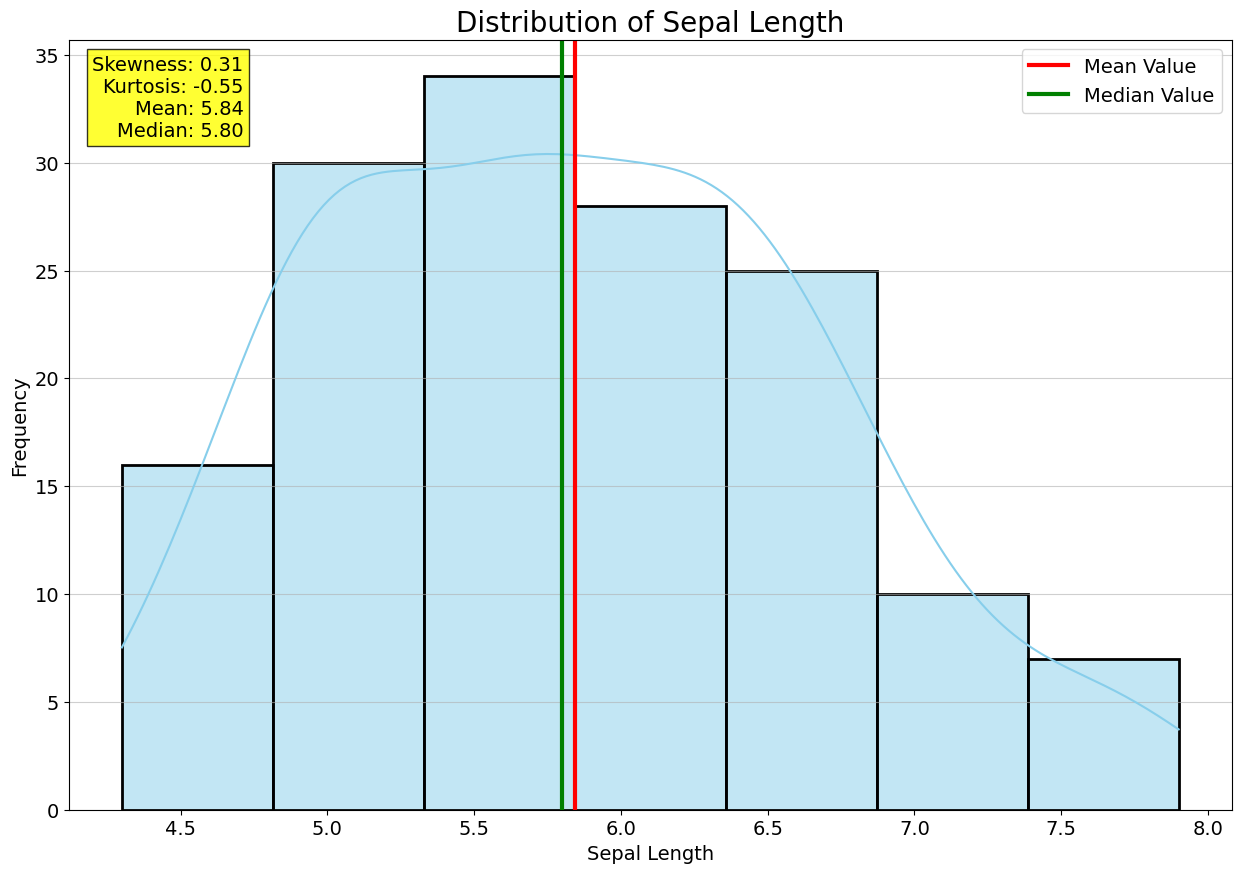

In [22]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['sepal_length'],
            kde=True,
            bins=7,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Sepal Length', size=20)
plt.xlabel('Sepal Length', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['sepal_length'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['sepal_length'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['sepal_length'].mean()
median = df['sepal_length'].median()
skewness = df['sepal_length'].skew()
kurtosis = df['sepal_length'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

In [23]:
std_dev = np.std(df['sepal_width']) # First using the Numpy .std Function to get the standard deviation of the Sepal Length variable.
data_points_num = len(df['sepal_width']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['sepal_width']) - np.min(df['sepal_width']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 8


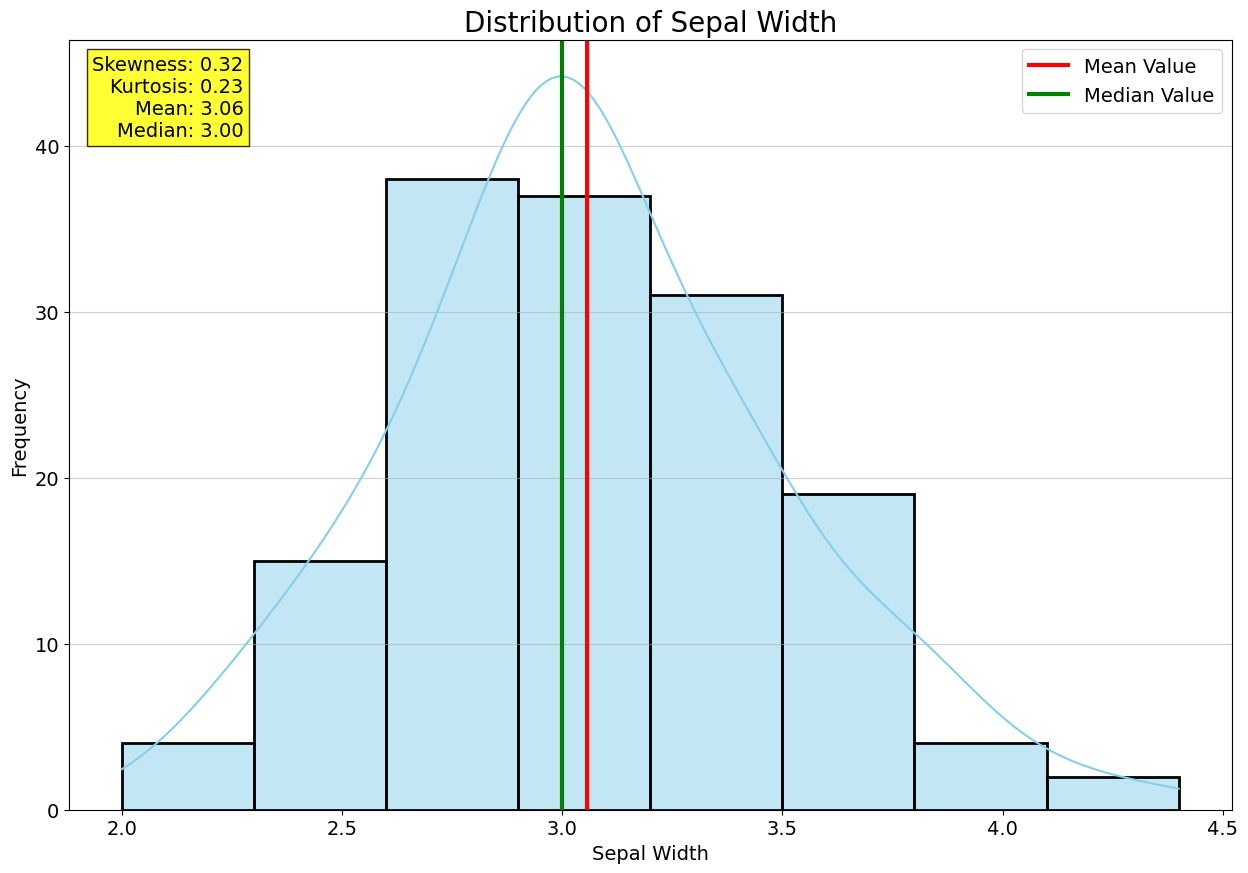

In [24]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['sepal_width'],
            kde=True,
            bins=8,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Sepal Width', size=20)
plt.xlabel('Sepal Width', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['sepal_width'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['sepal_width'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['sepal_width'].mean()
median = df['sepal_width'].median()
skewness = df['sepal_width'].skew()
kurtosis = df['sepal_width'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

In [25]:
std_dev = np.std(df['petal_length']) # First using the Numpy .std Function to get the standard deviation of the Petal Length variable.
data_points_num = len(df['petal_length']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['petal_length']) - np.min(df['petal_length']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 5


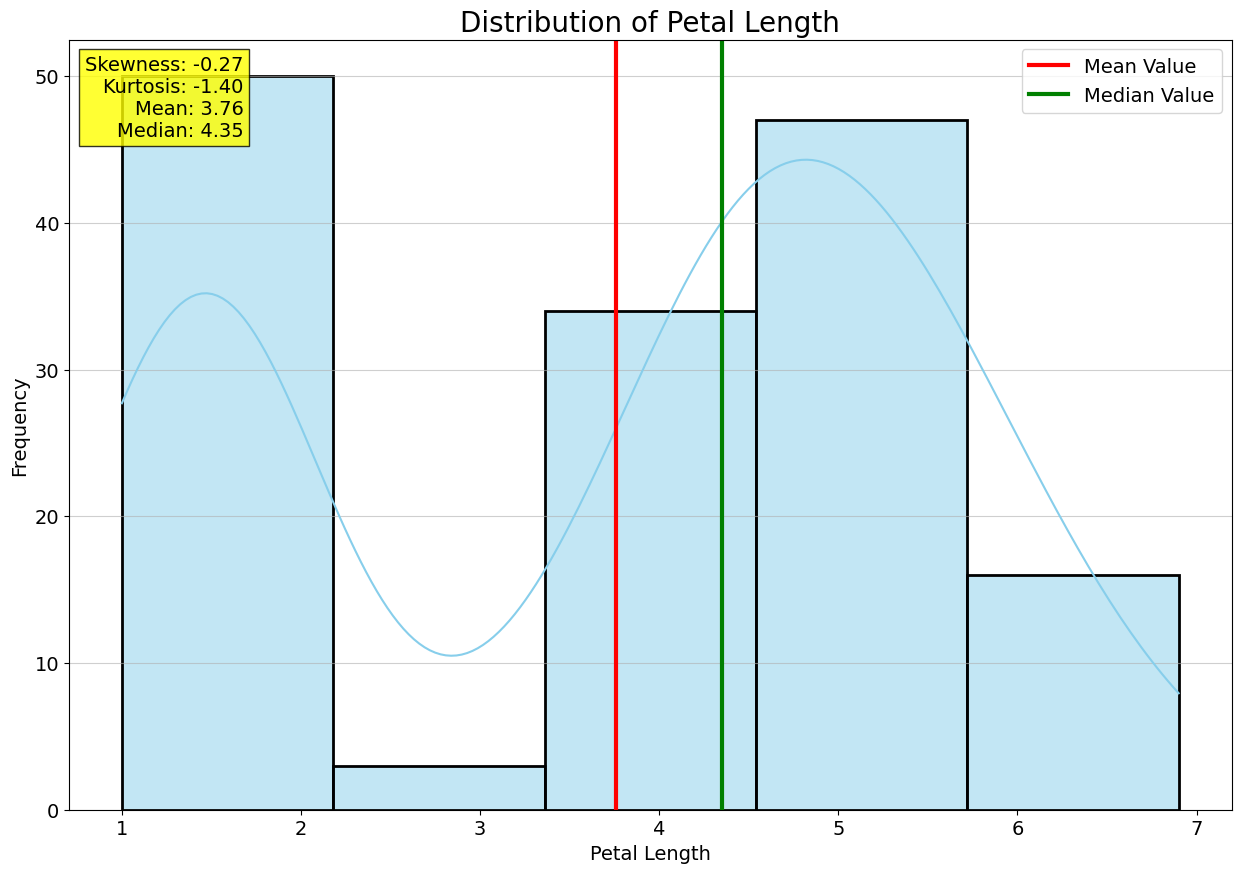

In [26]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['petal_length'],
            kde=True,
            bins=5,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Length', size=20)
plt.xlabel('Petal Length', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_length'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_length'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_length'].mean()
median = df['petal_length'].median()
skewness = df['petal_length'].skew()
kurtosis = df['petal_length'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

In [27]:
std_dev = np.std(df['petal_width']) # First using the Numpy .std Function to get the standard deviation of the Petal Width variable.
data_points_num = len(df['petal_width']) # Calculating the number of data points/ values in the data source.

# Calculate bin width using Scott's rule.
# Applying the formula with the standard deviation and number of data points.
# First part of the Calculation is multiplying the Std Dev by 3.5.
# Then the 2nd part of the calculation is getting the cube root of the number of data points.
bin_width = 3.5 * std_dev / (data_points_num ** (1/3))  # Finally dividing the result of the first calculation by the second part to get the optimal bin width.
# Then to see how many bins we need to have, we need to get the range of values from the min value to the max value.
data_range = np.max(df['petal_width']) - np.min(df['petal_width']) # To get this we use the Numpy Max & Min functions and take the MIN value away from the max Value.
num_bins = round(float(data_range / bin_width)) # To identify the number of bins we divide the range calculated by the optimal bin width. Using Round to get to the nearest whole number.

print("Bin Width based on Scott's rule:", num_bins) # Printing the optimal number of bins.

Bin Width based on Scott's rule: 5


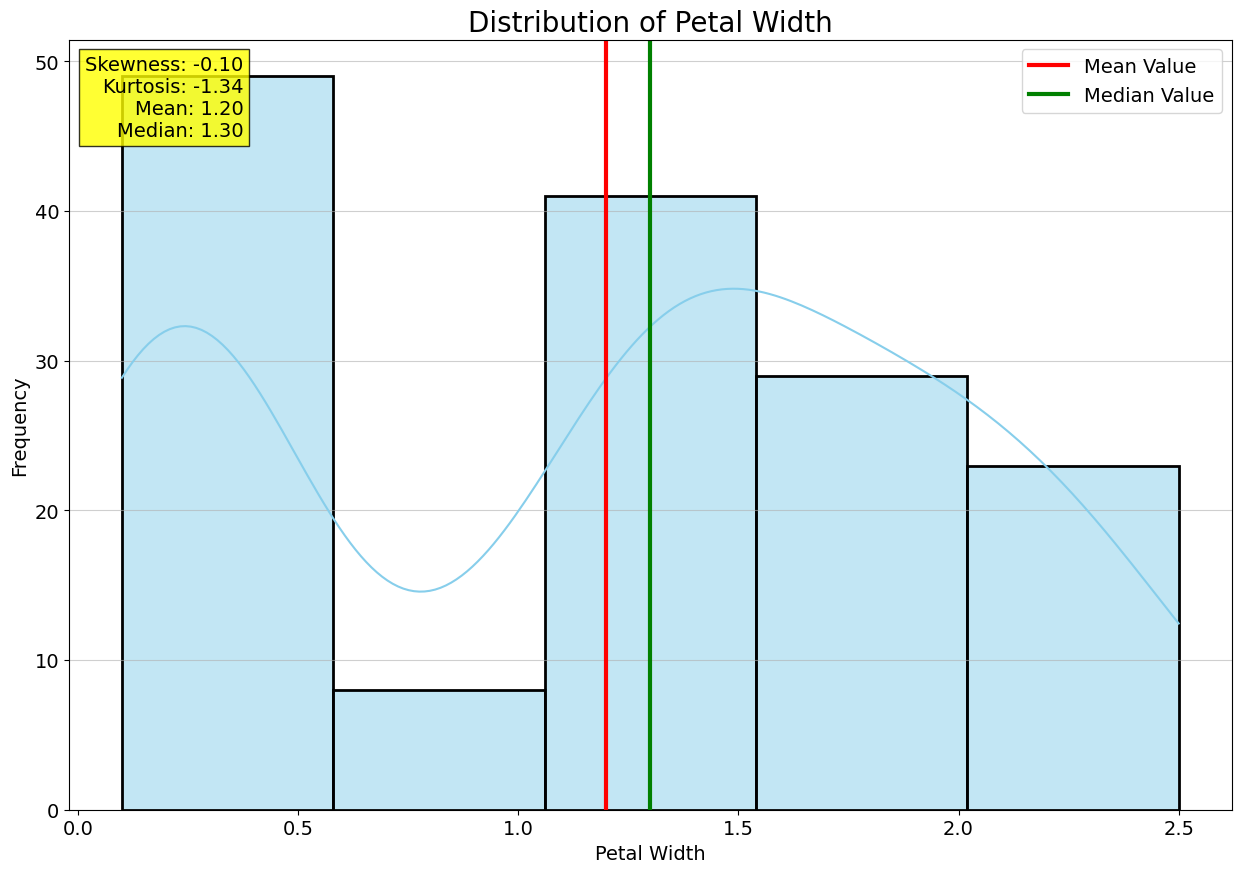

In [28]:
plt.figure(figsize=(15, 10))  # Setting the size of the plot

# Plotting the distribution
sns.histplot(df['petal_width'],
            kde=True,
            bins=5,
            color='skyblue',
            edgecolor='black',
            linewidth=2)

# Plot formatting
plt.title('Distribution of Petal Width', size=20)
plt.xlabel('Petal Width', size=14)
plt.ylabel('Frequency', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(axis='y', linestyle='-', alpha=0.6)

# Adding mean and median lines
plt.axvline(x=df['petal_width'].mean(),
            label='Mean Value',
            color='red',
            linewidth=3,
            linestyle='-')
plt.axvline(x=df['petal_width'].median(),
            label='Median Value',
            color='green',
            linewidth=3,
            linestyle='-')
plt.legend(fontsize=14)

# Adding skewness, kurtosis, mean, and median to the plot
mean = df['petal_width'].mean()
median = df['petal_width'].median()
skewness = df['petal_width'].skew()
kurtosis = df['petal_width'].kurt()

plt.text(0.15, 0.98,
        f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}', 
         transform=plt.gca().transAxes,
         fontsize=14, 
         bbox=dict(facecolor='yellow', alpha=0.8),
         verticalalignment='top', horizontalalignment='right')

# Show plot
plt.show()

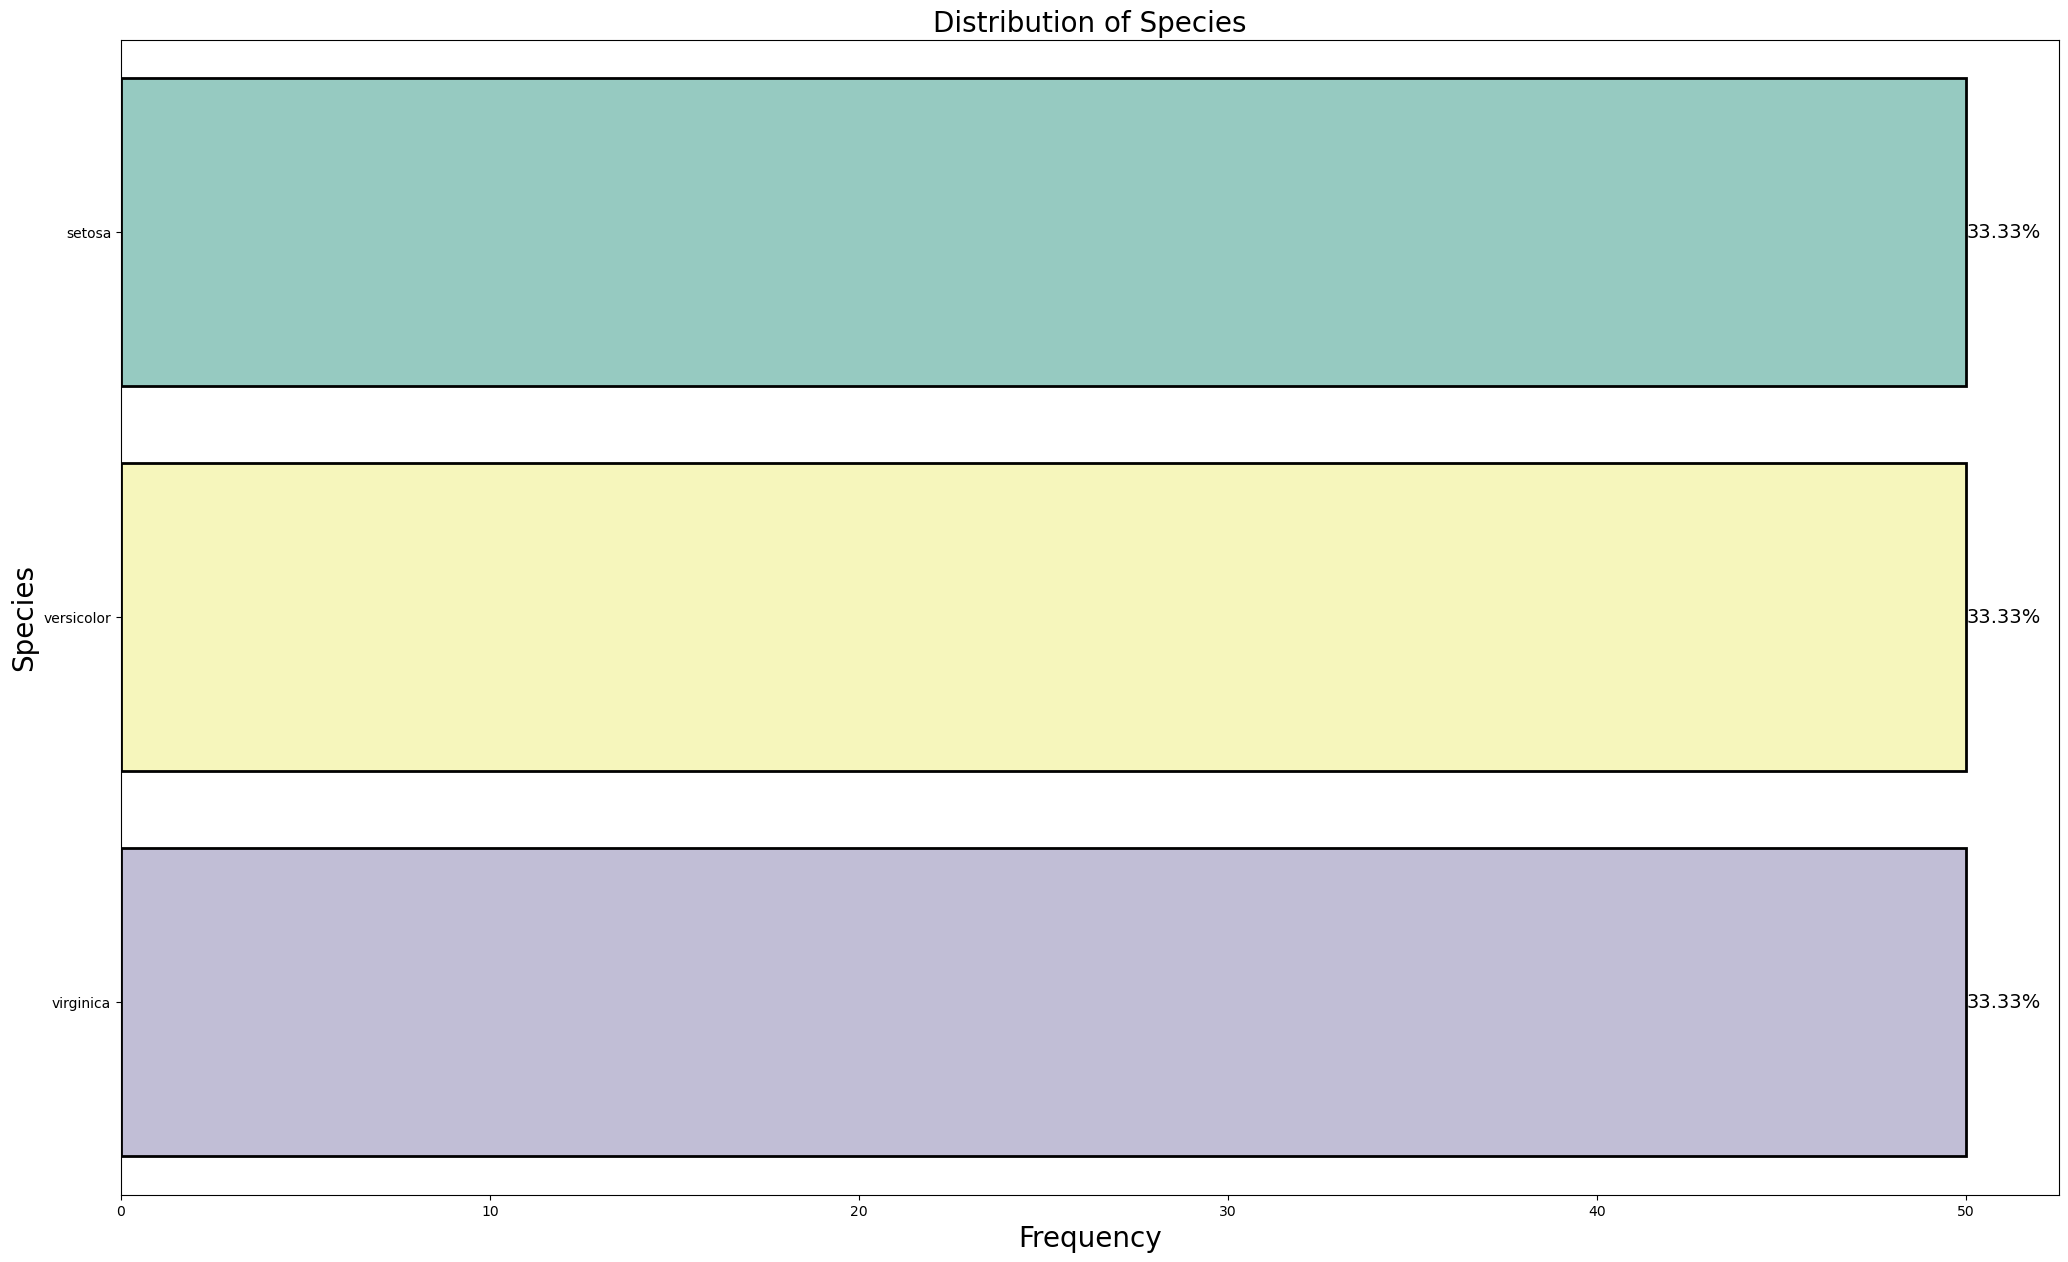

In [29]:
plt.figure(figsize=(25, 15))  # Setting the size of the plot
ax = sns.countplot(data=df, y="species", edgecolor='black', palette='Set3', linewidth=2)
plt.title('Distribution of Species', size=20)
plt.xlabel('Frequency', size=20)
plt.ylabel('Species', size=20)

total = len(df['species'])
for p in ax.patches:
    percent = '{:.2f}%'.format(100 * p.get_width()/total)
    x_ax = p.get_width()
    y_ax = p.get_y() + p.get_height()/2
    ax.annotate(percent, (x_ax, y_ax), ha='left', va='center', fontsize=14)

plt.show()

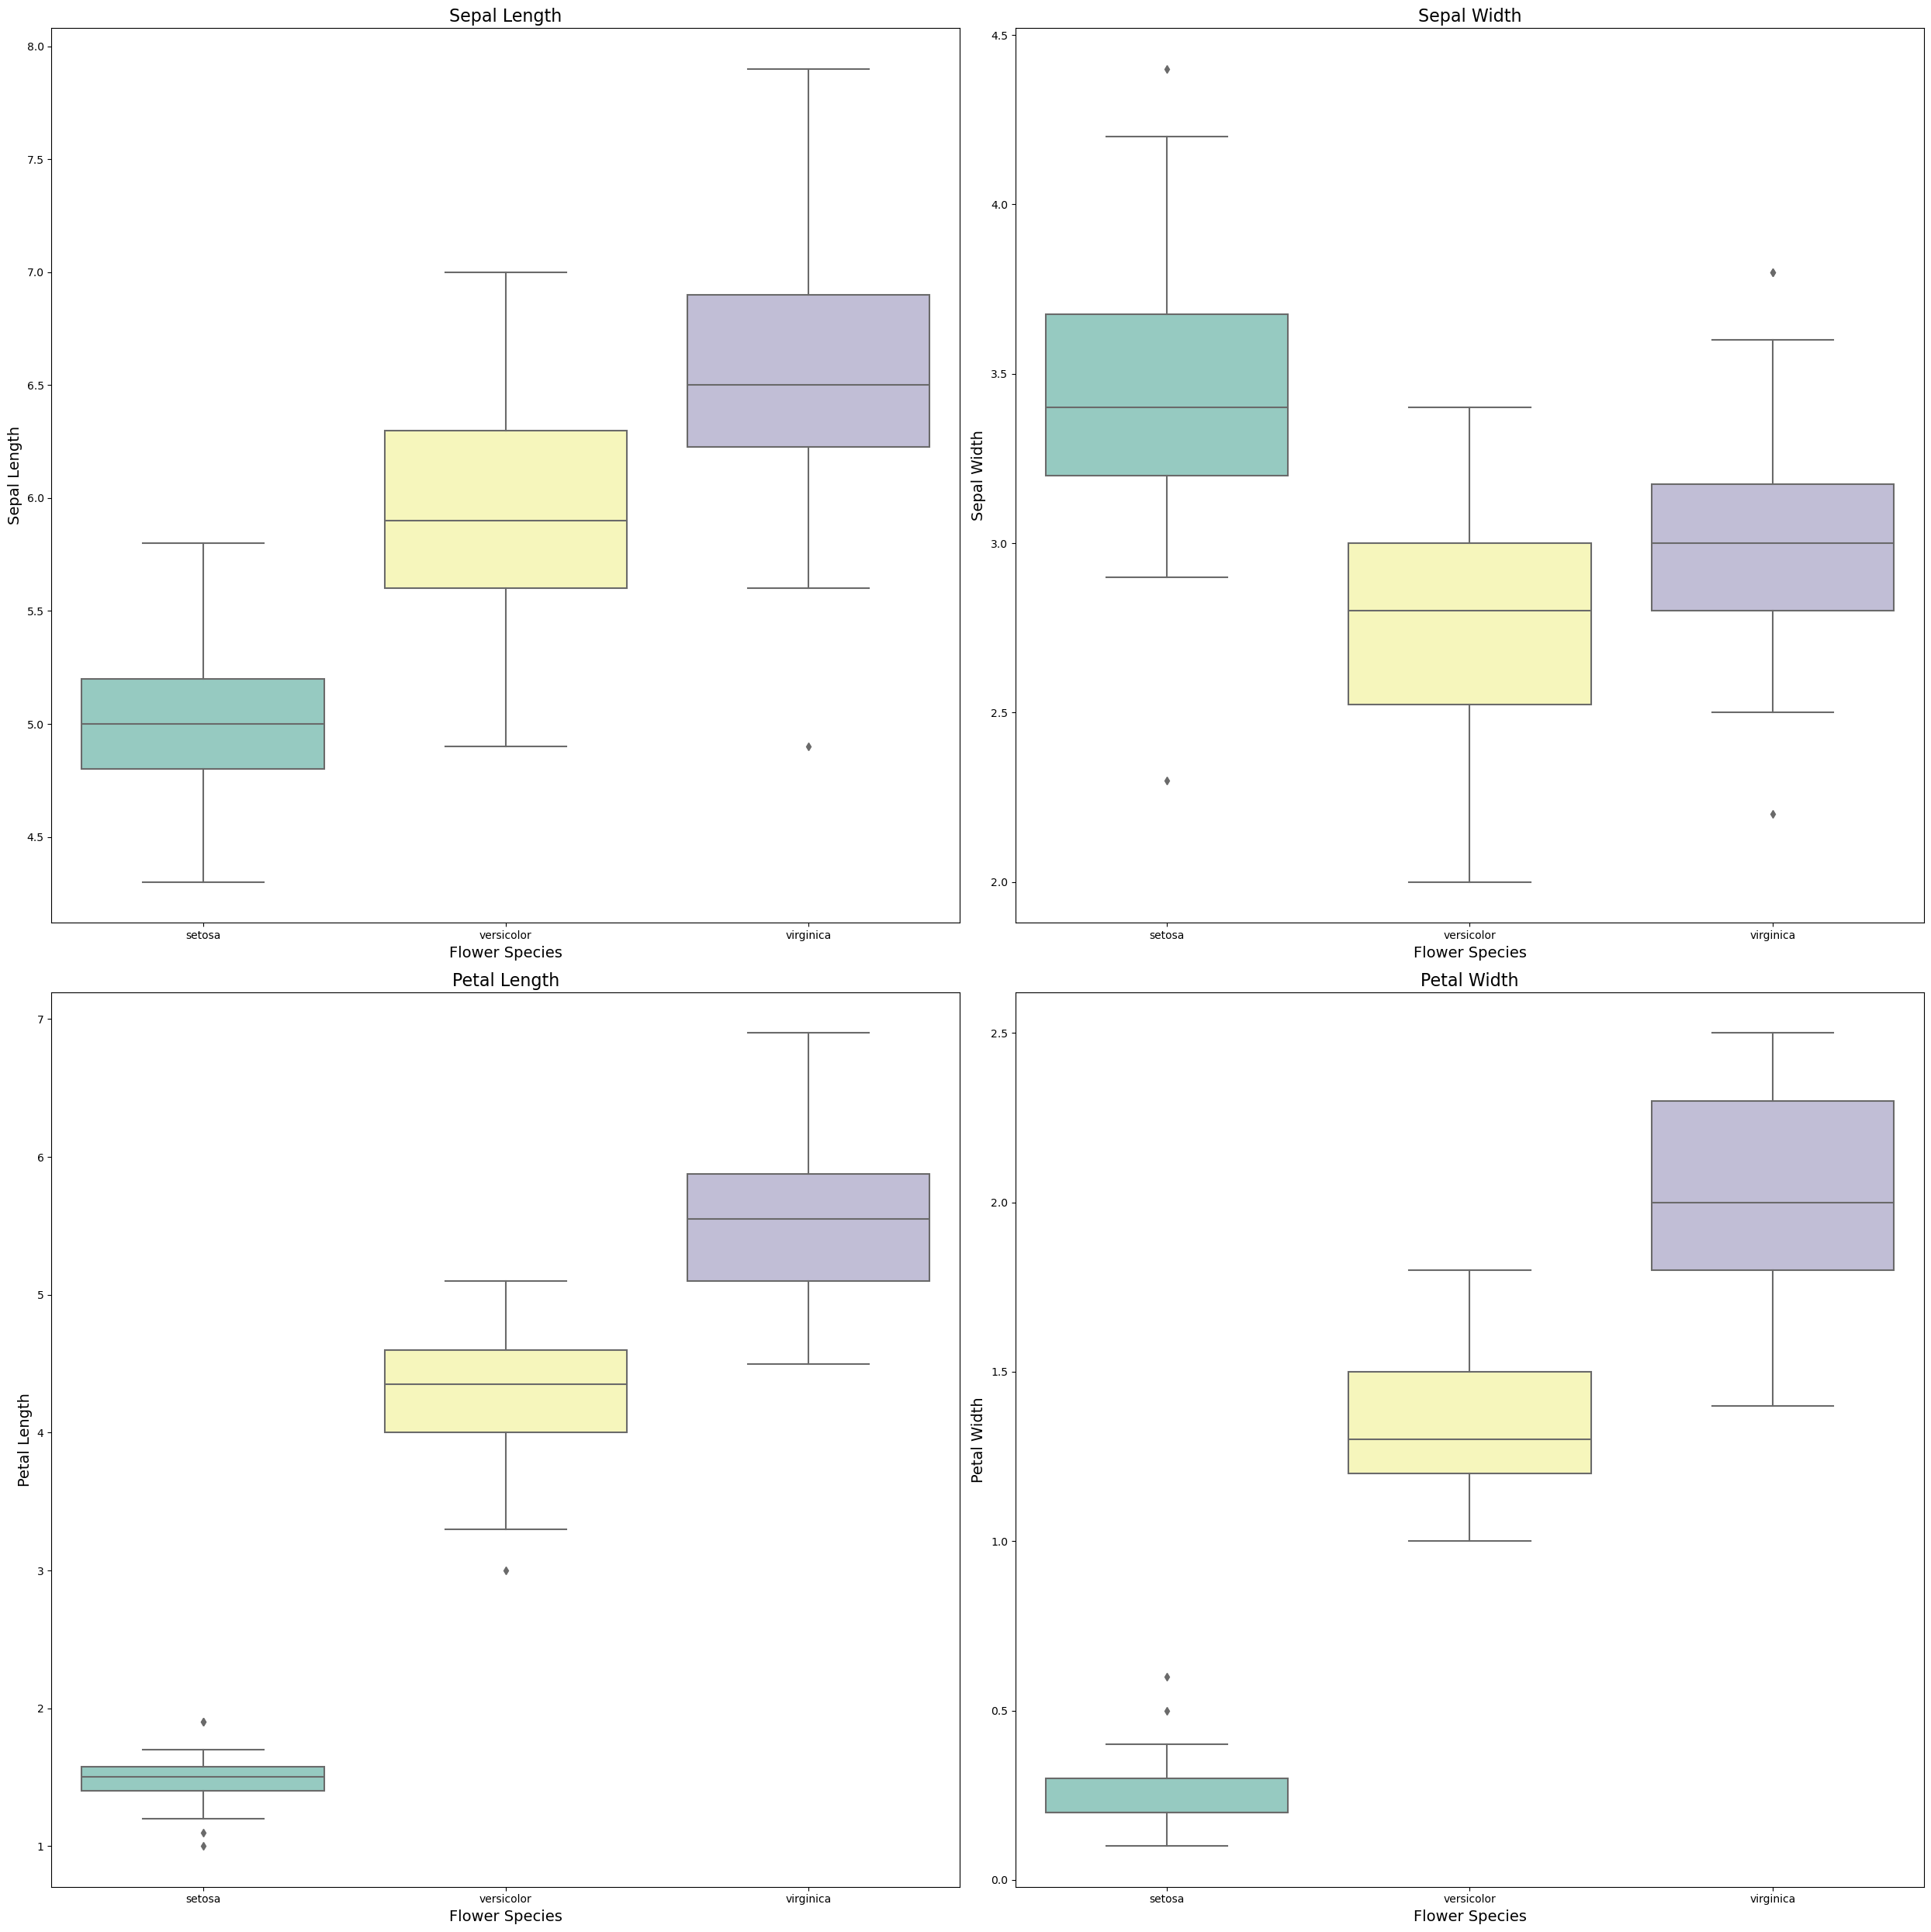

In [30]:
a, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.boxplot(x="species", y="sepal_length", data=df, ax=ax[0, 0], palette='Set3')
ax[0, 0].set_title('Sepal Length', size=16)
ax[0, 0].set_xlabel('Flower Species', size=14)
ax[0, 0].set_ylabel('Sepal Length', size=14)

sns.boxplot(x="species", y="sepal_width", data=df, ax=ax[0, 1], palette='Set3')
ax[0, 1].set_title('Sepal Width', size=16)
ax[0, 1].set_xlabel('Flower Species', size=14)
ax[0, 1].set_ylabel('Sepal Width', size=14)

sns.boxplot(x="species", y="petal_length", data=df, ax=ax[1, 0], palette='Set3')
ax[1, 0].set_title('Petal Length', size=16)
ax[1, 0].set_xlabel('Flower Species', size=14)
ax[1, 0].set_ylabel('Petal Length', size=14)

sns.boxplot(x="species", y="petal_width", data=df, ax=ax[1, 1], palette='Set3')
ax[1, 1].set_title('Petal Width', size=16)
ax[1, 1].set_xlabel('Flower Species', size=14)
ax[1, 1].set_ylabel('Petal Width', size=14)

plt.tight_layout()
plt.show()

## Correlation Analysis

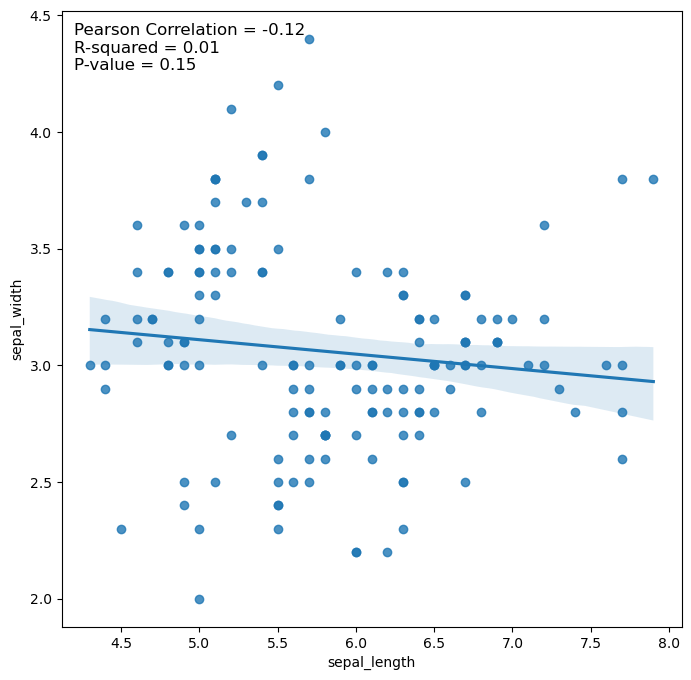

In [31]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="sepal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["sepal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

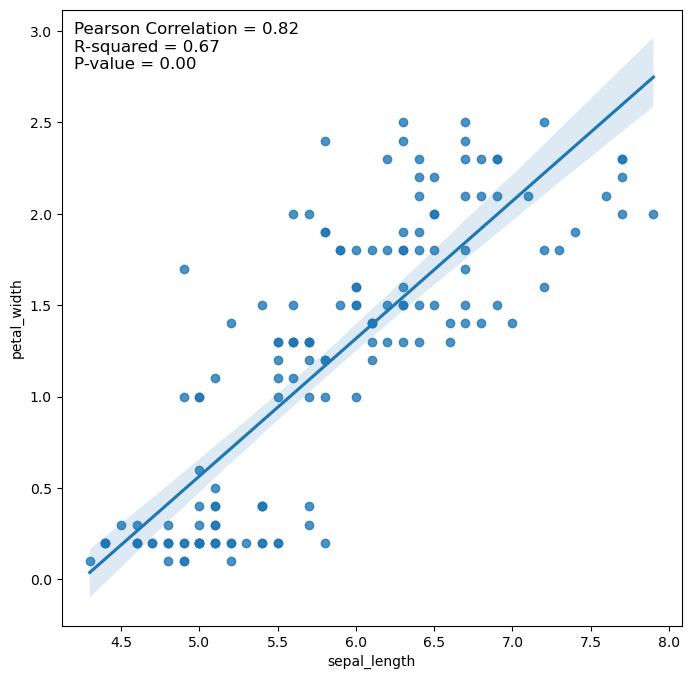

In [32]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

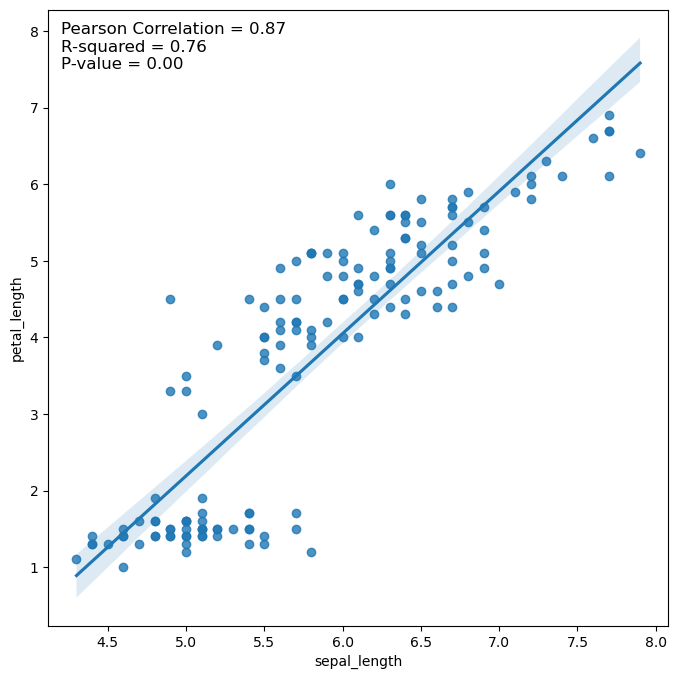

In [33]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_length", y="petal_length") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_length"], df["petal_length"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

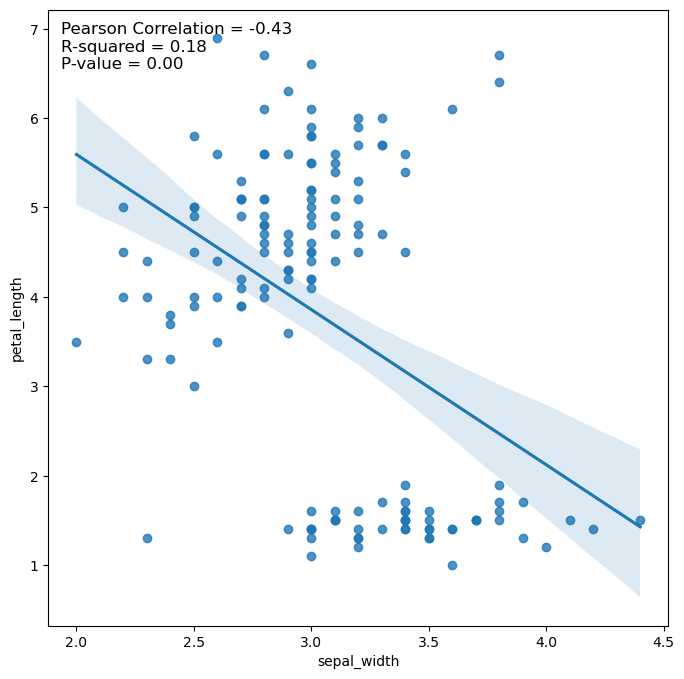

In [34]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_width", y="petal_length") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_width"], df["petal_length"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

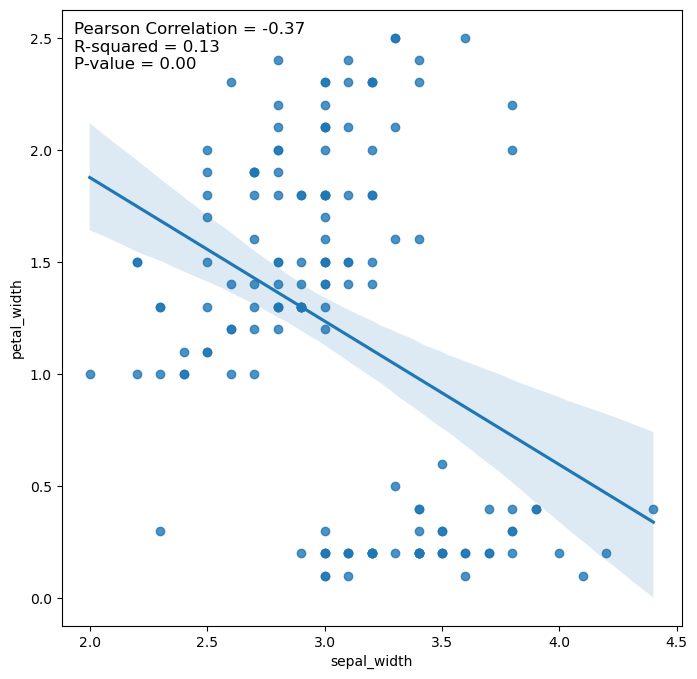

In [35]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="sepal_width", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["sepal_width"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

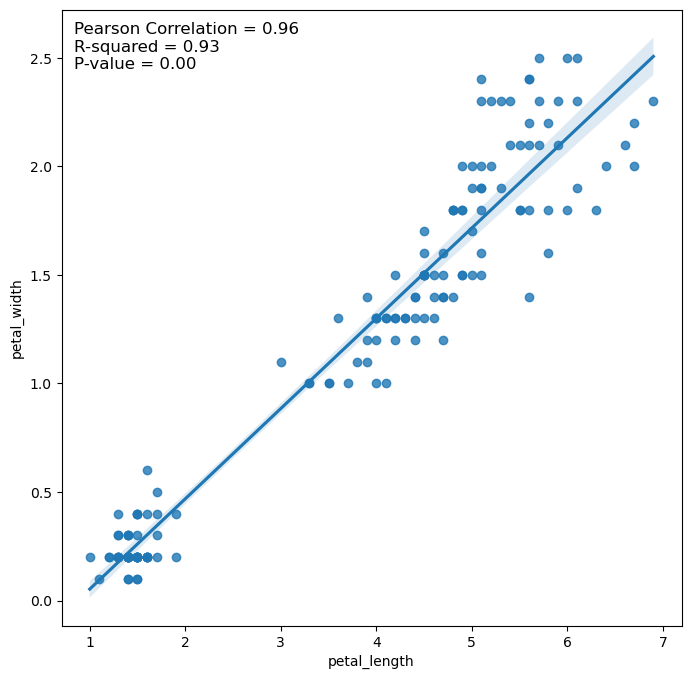

In [36]:
plt.figure(figsize=(8, 8))  # Setting the Figure size.
ax = sns.regplot(data=df, x="petal_length", y="petal_width") # Creating a Regression Plot called ax.
r_value, p_value = stats.pearsonr(df["petal_length"], df["petal_width"]) # Calculating Pearson correlation coefficient and P-value for flipper length and body mass.
r_squared = r_value**2 # Calculating R-squared value

# Adding Pearson correlation, R-squared, and P-value as label.
ax.text(0.02, 0.98,  # Adding the text at the axis position 0.02 on the X-Axis and 0.98 on the Y-Axis. I want it in the top left corner away from the data points.
        # Creating a text field with a name and then the value of the Pearson Correlation. Doing the same for R-squared and P-Value
        f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",  # Specifying to display to 2 decimal places for Pearson Correlation, R-squared and 3 decimal places for P-Value.
        transform=ax.transAxes,  # Specifying the coordinates of the text.
        fontsize=12,  # Setting Font Size to 12.
        va='top')  # Setting the text to be vertically aligned to the top.
plt.grid(False)  # Setting the grid to be false to remove the grid lines.
plt.show()  # Showing the Plot.

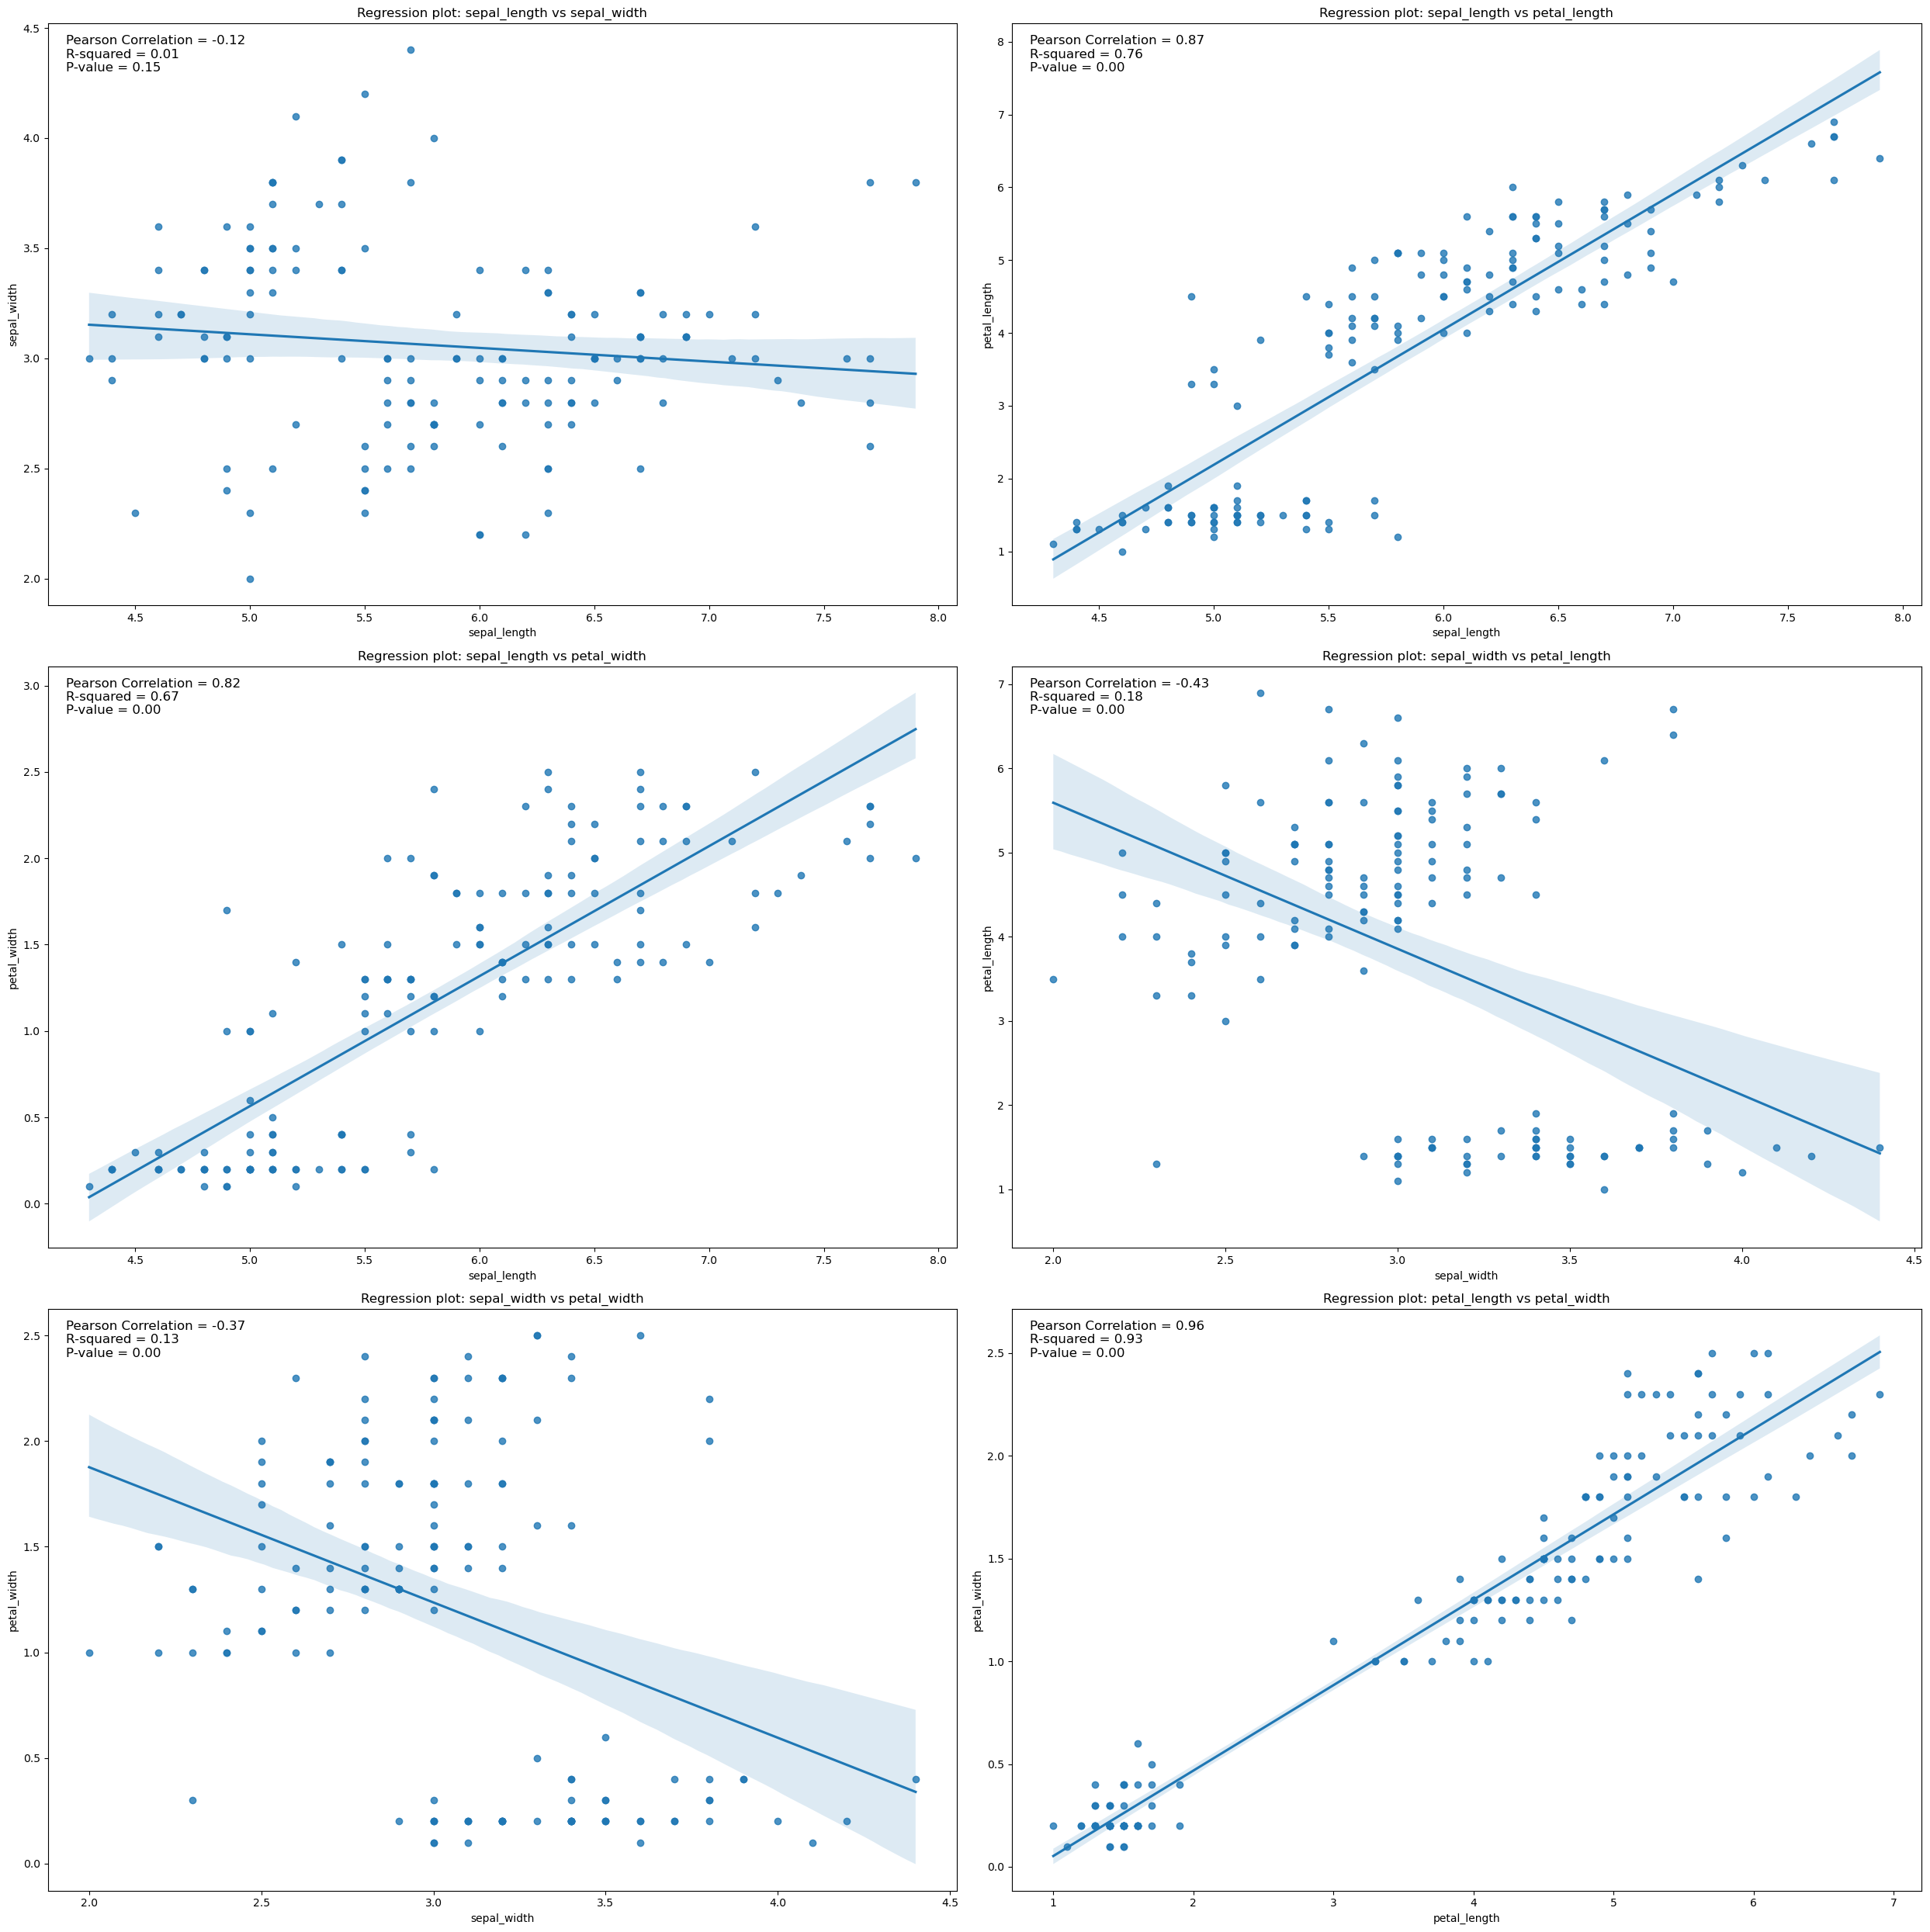

In [37]:
numeric_df = df.select_dtypes(include=[np.number])
# Get all combinations of numeric columns
column_combinations = list(combinations(numeric_df.columns, 2))

# Create a 3 by 2 subplot and add regression plots for each combination of numeric variables
fig, axes = plt.subplots(3, 2, figsize=(25, 25))

for i, ax in enumerate(axes.flatten()):
    if i < len(column_combinations):
        x_column, y_column = column_combinations[i]
        
        sns.regplot(data=numeric_df, x=x_column, y=y_column, ax=ax)
        
        r_value, p_value = stats.pearsonr(numeric_df[x_column], numeric_df[y_column])
        r_squared = r_value**2
        
        ax.text(0.02, 0.98,
                f"Pearson Correlation = {r_value:.2f}\nR-squared = {r_squared:.2f}\nP-value = {p_value:.2f}",
                transform=ax.transAxes,
                fontsize=12,
                va='top')
        
        ax.grid(False)
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)
        ax.set_title(f'Regression plot: {x_column} vs {y_column}')

# Remove empty subplots
for i in range(len(column_combinations), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig(os.path.join(corr_path, 'Scatter.png'))
plt.show()


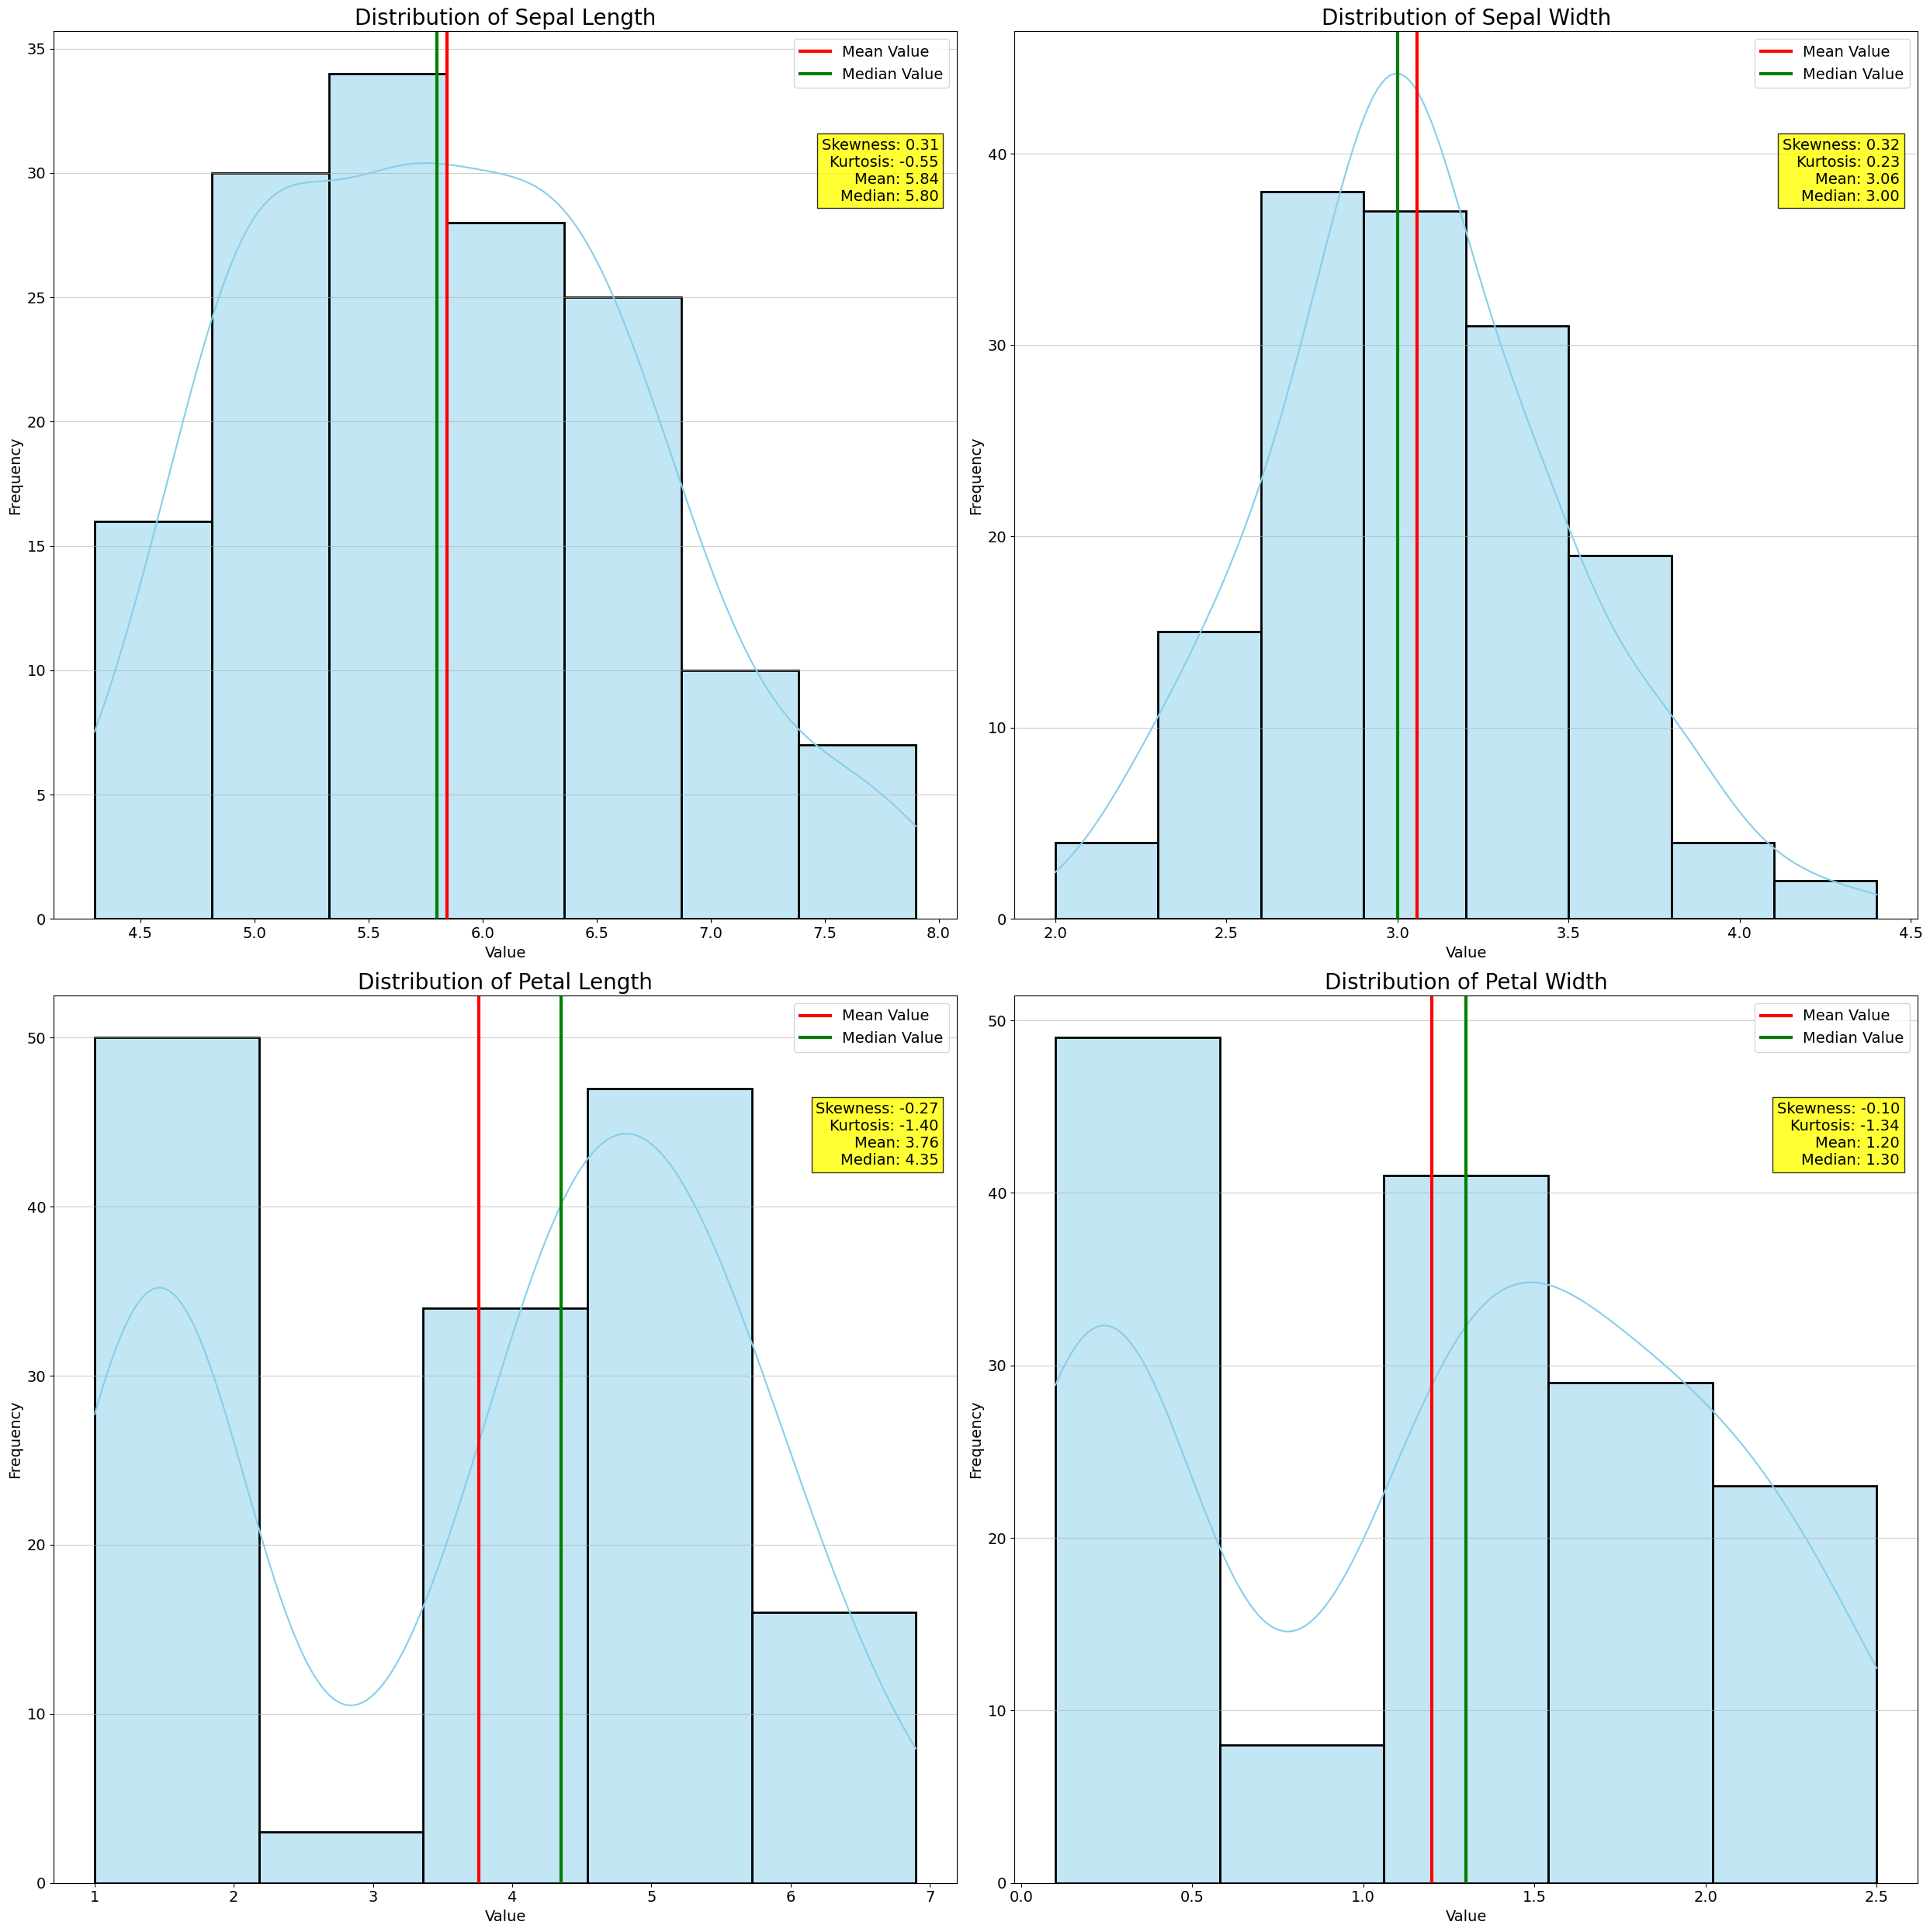

In [38]:
def plot_distribution(data, title, bin_size):
    # Plotting the distribution
    sns.histplot(data, kde=True, bins=bin_size, color='skyblue', edgecolor='black', linewidth=2)
    
    # Adding mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    plt.axvline(x=mean_val, label='Mean Value', color='red', linewidth=3, linestyle='-')
    plt.axvline(x=median_val, label='Median Value', color='green', linewidth=3, linestyle='-')

    # Adding skewness, kurtosis, mean, and median to the plot
    skewness = data.skew()
    kurtosis = data.kurt()
    plt.text(0.98, 0.88, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mean_val:.2f}\nMedian: {median_val:.2f}', 
             transform=plt.gca().transAxes, fontsize=14, 
             bbox=dict(facecolor='yellow', alpha=0.8),
             verticalalignment='top', horizontalalignment='right')

    # Plot formatting
    plt.title(title, size=20)
    plt.xlabel('Value', size=14)
    plt.ylabel('Frequency', size=14)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.legend(fontsize=14)

# Create subplots
plt.figure(figsize=(25, 25))  # Setting the size of the plot

plt.subplot(2, 2, 1)
plot_distribution(df['sepal_length'], 'Distribution of Sepal Length', bin_size=7)

plt.subplot(2, 2, 2)
plot_distribution(df['sepal_width'], 'Distribution of Sepal Width', bin_size=8)

plt.subplot(2, 2, 3)
plot_distribution(df['petal_length'], 'Distribution of Petal Length', bin_size=5)

plt.subplot(2, 2, 4)
plot_distribution(df['petal_width'], 'Distribution of Petal Width', bin_size=5)

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(dist_path, 'Histogram.png'))
plt.show()


https://realpython.com/numpy-scipy-pandas-correlation-python/ - # r_value, p_value = stats.pearsonr(df["petal_length"], df["petal_width"])